In [19]:
# Finding exoplanets with Python + Lightkurve

In [20]:
import lightkurve as lk
import numpy as np
%matplotlib inline

<Axes: title={'center': 'Target ID: 8462852, Cadence: 11915'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

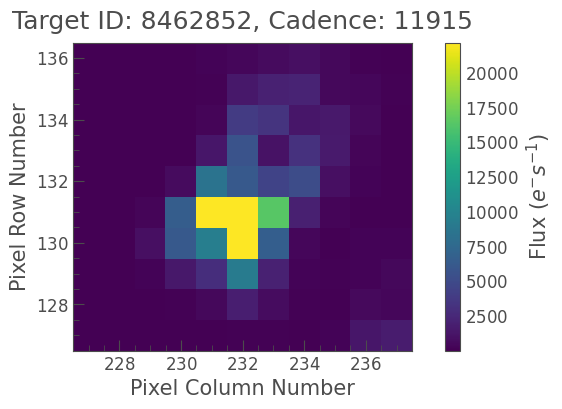

In [21]:
# Download the pixelfile for a given star
# A quarter means a quarter of a year
pixelfile = lk.search_targetpixelfile('KIC 8462852', quarter=4).download()
# Show a single snapshot
pixelfile.plot(frame=1)


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

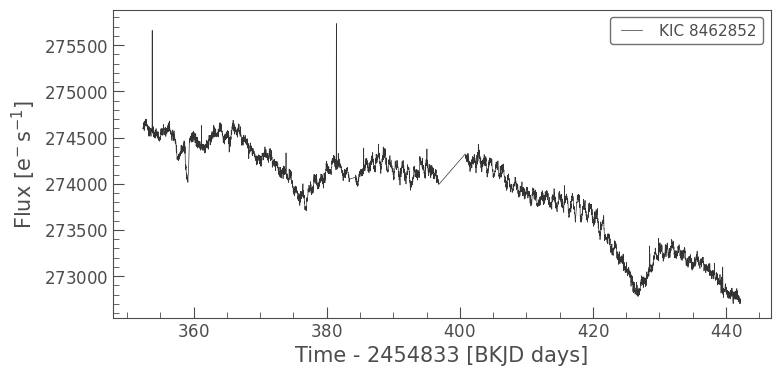

In [28]:
lc = pixelfile.to_lightcurve(aperture_mask='all')
lc.plot()


<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

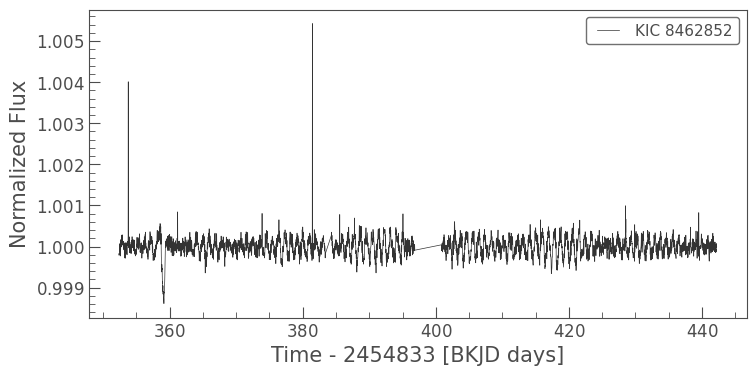

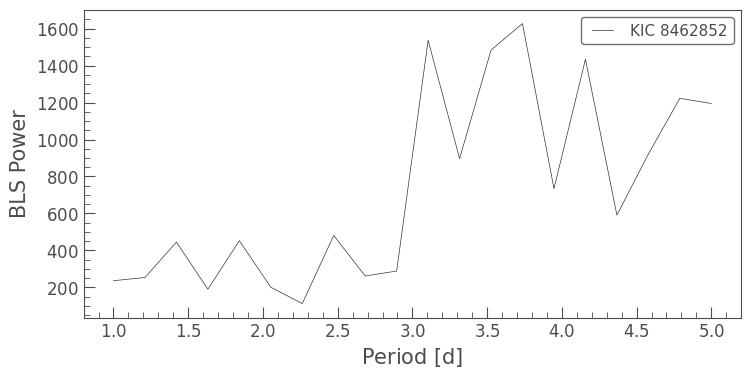

In [23]:
# Flatten the lightcurve
flat_lc = lc.flatten()
flat_lc.plot()

# Try and find the period of the most prominent orbiting object
period = np.linspace(1, 5, 20)
# BLS = Box Least Squares
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()
